In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
from sklearn.cross_validation import train_test_split
#Ref: https://github.com/llSourcell/linear_regression_live/blob/master/demo.py


C:\Users\LOKI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def TrainBatch(df_,k_):
    sample_=df_.sample(k_)
    #xtr_=np.asmatrix(sample_.drop('PRICE', axis = 1))
    #ytr_=np.asmatrix(sample_['PRICE'])
    return np.asmatrix(sample_.drop('PRICE', axis = 1)),np.asmatrix(sample_['PRICE']) #xtr_,ytr_;

def TotalLoss(xtr_, ytr_, w_, b_, k_):
    loss=0;
    #print(type(xtr_))
    for i in range(k_):
        loss+= (np.asscalar(ytr_[:,i] - np.matmul(xtr[i],w_)-b_))**2
        print('dloss',loss)
    return loss/k_; 


def MSGDReg(xtr_df_,prev_loss,r_,itern_,k_,w_=np.asmatrix(np.random.normal(0,0.1,(13,1))),b_=1):#np.random.randn()):
    if(0<itern_):
        #print(b_)
        #print('\n\t\tITERN',itern_)
        derv_w,derv_b=np.empty_like(w_),0;
        #print(derv_w.shape)
        xtr_,ytr_=TrainBatch(xtr_df_,k_)
        #print(ytr_[:,10].shape)
        for i in range(k_):
            #print('\n',ytr_[:,i],'\t', np.matmul(xtr_[i],w_)+b_,'\t', '\t', ytr_[:,i]-np.matmul(xtr_[i],w_)-b_)
            derv_w+= (np.matmul(xtr_[i].T, ytr_[:,i] - np.matmul(xtr_[i],w_)-b_))
            derv_b+=(ytr_[:,i]-np.matmul(xtr_[i],w_)-b_)
            #print(derv_w.shape)    
        W_ =(w_)-(r_*(-2/k_)*derv_w)
        B_ =(b_)-(r_*(-2/k_)*derv_b)
        #print('\nb_&B_','\t',B_)
        if(W_==w_).all():
            print('Break:\titern_',itern_)
            print('LearningRate: r_',r_)
            return W_,B_
        #loss=TotalLoss(xtr_,ytr_,W_.T,B_,k_)
        #print('Current Loss:',loss)
        #print('Percentage change in loss',abs((prev_loss - loss)/prev_loss)*100)
        #if((abs(prev_loss - loss)/prev_loss)*100 <= 0.001):
        #    print('Break:\titern_',itern_)
        #   print('Minimized loss:',loss)
        #    return W_,B_;
        #else:
        return MSGDReg(xtr_df_,prev_loss,(r_+10**-2)/2,itern_-1,k_,W_,B_);
    else:
        print('LearningRate: r_',r_)
        print('itern_:',itern_)
        return w_,b_;


Train, Test data shape (339, 13) (167, 13)
LearningRate: r_ 0.010000000000000002
itern_: 0


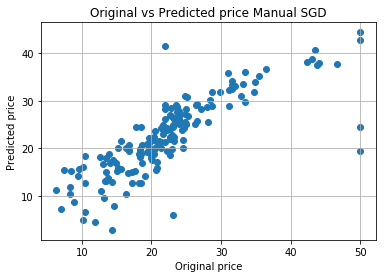


Mean squared error:Manual SGD 26.204917463853754
Train, Test data shape (354, 13) (152, 13)


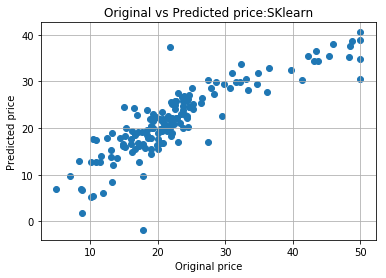


Mean squared error SKlearn 25.980580728106816


In [47]:
x = load_boston().data
y = load_boston().target
xtr, xte, ytr, yte = train_test_split(x,y, test_size=0.33, random_state=7)
print('Train, Test data shape',xtr.shape, xte.shape,)

scaler = preprocessing.StandardScaler().fit(xtr)
xtr = scaler.transform(xtr)
scaler = preprocessing.StandardScaler().fit(xte)
xte = scaler.transform(xte)
xtr_df=pd.DataFrame(xtr)
xtr_df['PRICE']= ytr;
xte1=np.asmatrix(xte)
w_star,b_star= MSGDReg(xtr_df_=xtr_df, prev_loss=1, itern_=1001, k_=100,  r_=1)
ypre=[]
for i in range(len(xte)):
    ypre.append(np.asscalar(np.matmul(xte1[i],w_star)+b_star))
ypre2=[]
for i in range(len(xtr)):
    ypre2.append(np.asscalar(np.matmul(xtr[i],w_star)+b_star))
#print('\n\n',w_star,'\n\n',b_star)
plt.scatter(yte,ypre)
plt.grid()
plt.xlabel('Original price')
plt.ylabel('Predicted price')
plt.title('Original vs Predicted price Manual SGD')
plt.show()
print('\nMean squared error:Manual SGD',MSE(yte,ypre))


#SKlearn SGD Regressor
xsk = load_boston().data
ysk = load_boston().target
xtrsk, xtesk, ytrsk, ytesk = train_test_split(xsk,ysk, test_size=0.3, random_state=22)
print('Train, Test data shape',xtrsk.shape, xtesk.shape,)
scaler = preprocessing.StandardScaler().fit(xtrsk)
xtrsk = scaler.transform(xtrsk)
scaler = preprocessing.StandardScaler().fit(xtesk)
xtesk = scaler.transform(xtesk)

clf = SGDRegressor()
clf.fit(xtrsk,ytrsk)
ypresk=clf.predict(xtesk)

plt.scatter(ytesk,ypresk)
plt.grid()
plt.xlabel('Original price')
plt.ylabel('Predicted price')
plt.title('Original vs Predicted price:SKlearn')
plt.show()
print('\nMean squared error SKlearn',MSE(ytesk,ypresk))

In [5]:
#Weight comparison of Manual SGD & SKlearn SGD
from prettytable import PrettyTable
weights = PrettyTable()
weights.add_column("Weights of Manual SGD",w_star)
weights.add_column("Weights of Sklearn's SGD",clf.coef_)

print(weights)

+-----------------------+--------------------------+
| Weights of Manual SGD | Weights of Sklearn's SGD |
+-----------------------+--------------------------+
|    [[-0.87814172]]    |    -0.414221985749883    |
|     [[0.61961531]]    |   0.26938217207260273    |
|     [[-0.097493]]     |   -0.5368789991059597    |
|     [[0.69606466]]    |    1.0041556303713557    |
|    [[-1.95888132]]    |   -0.6243906130874489    |
|     [[3.85742508]]    |    2.9659254701629663    |
|    [[-0.55850086]]    |   -0.1308090167719032    |
|    [[-3.12416364]]    |   -1.7392168539582518    |
|     [[2.11596916]]    |    0.6530847312271582    |
|    [[-1.56332043]]    |   -0.08376598601018218   |
|    [[-2.13330184]]    |    -1.492972713634007    |
|     [[0.88439338]]    |    1.0850018258706666    |
|     [[-2.7618481]]    |    -3.659450964117478    |
+-----------------------+--------------------------+


In [50]:
#table = PrettyTable()
table = PrettyTable(['Model', 'Misclassification error'])
table.add_row(['Manual SGD(train_data)',MSE(ytr,ypre2)])
table.add_row(['SKlearn(train_data)',MSE(ytrsk,clf.predict(xtrsk))])
table.add_row(['Manual SGD(test_data)',MSE(yte,ypre)])
table.add_row(['SKlearn SGD(test_data)',MSE(ytesk,ypresk)])
print(table)

+------------------------+-------------------------+
|         Model          | Misclassification error |
+------------------------+-------------------------+
| Manual SGD(train_data) |    21.31571776718624    |
|  SKlearn(train_data)   |    23.22862174127101    |
| Manual SGD(test_data)  |    26.204917463853754   |
| SKlearn SGD(test_data) |    25.980580728106816   |
+------------------------+-------------------------+
